In [9]:
import graphviz 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import preprocessing
%matplotlib inline

In [23]:
# Load in our dataset
iris = load_iris()

# Adapted from: https://stackoverflow.com/questions/43159754/datasets-load-iris-in-python
X = iris.data 
target = iris.target 
class_names = iris.target_names
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

df = pd.DataFrame(X, columns=col_names)
df['species'] = target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'scatter')

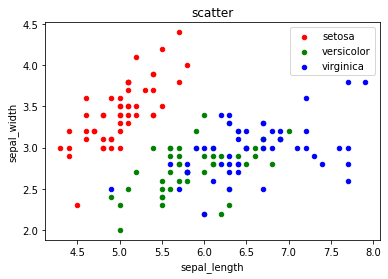

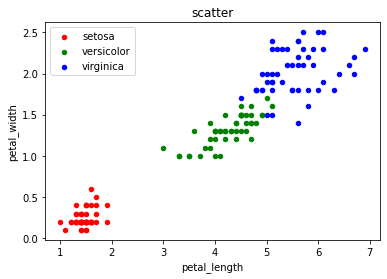

In [26]:
# Visualize our dataset (from: https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning)
ax = df[df.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', color='red', label='setosa')
df[df.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width', color='green', label='versicolor', ax=ax)
df[df.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width', color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

ax2 = df[df.species=='setosa'].plot.scatter(x='petal_length', y='petal_width', color='red', label='setosa')
df[df.species=='versicolor'].plot.scatter(x='petal_length', y='petal_width', color='green', label='versicolor', ax=ax2)
df[df.species=='virginica'].plot.scatter(x='petal_length', y='petal_width', color='blue', label='virginica', ax=ax2)
ax2.set_title("scatter")

In [31]:
# Initialize our decision tree object
clf = tree.DecisionTreeClassifier()

In [32]:
# Train our decision tree (tree induction + pruning)
clf = clf.fit(iris.data, iris.target)

In [40]:
# Test model with a prediction
X_pred = [[7.5, 3.1, 6, 2.1]]
y_pred = clf.predict_proba(X_pred)[0]

print(f"Setosa: {y_pred[0] * 100}%")
print(f"Versicolor: {y_pred[1] * 100}%")
print(f"Virginica: {y_pred[2] * 100}%")

Setosa: 0.0%
Versicolor: 0.0%
Virginica: 100.0%


[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

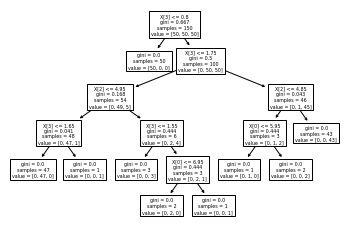

In [41]:
# Visualize the decision tree
tree.plot_tree(clf)

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.pdf'